# Tarefa 2 - Classificador Linear

Entendimento da base de dados

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dogs_cats.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2000 non-null   int64  
 1   comprimento  2000 non-null   float64
 2   peso         2000 non-null   float64
 3   classe       2000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 62.6+ KB


In [ ]:
df.head()

,Unnamed: 0,comprimento,peso,classe
0,0,45.231415,431.548671,cachorro
1,1,38.003753,517.870914,gato
2,2,53.608592,444.025762,cachorro
3,3,39.315731,524.066579,gato
4,4,45.581301,450.552000,cachorro


In [ ]:
df.tail()

,Unnamed: 0,comprimento,peso,classe
1995,1995,37.590457,587.274926,gato
1996,1996,43.818870,416.846089,cachorro
1997,1997,36.876470,483.215531,gato
1998,1998,49.415613,514.637485,cachorro
1999,1999,37.640400,548.746906,gato


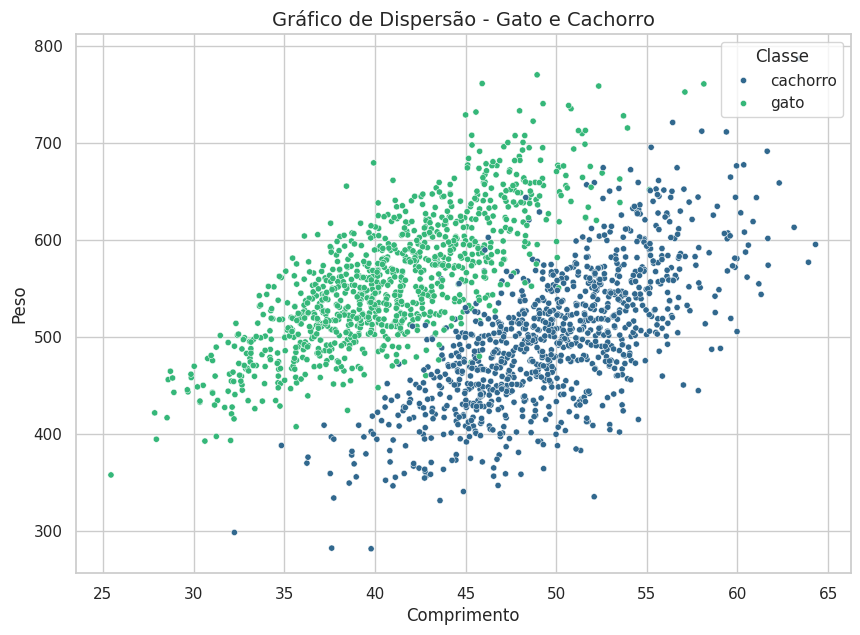

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Gráfico de dispersão
plt.figure(figsize=(10,7))
scatter = sns.scatterplot(data=df, x='comprimento', y='peso', hue='classe', palette='viridis', s=20)

# Títulos e rótulos
plt.title('Gráfico de Dispersão - Gato e Cachorro', fontsize=14)
plt.xlabel('Comprimento', fontsize=12)
plt.ylabel('Peso', fontsize=12)

# Mostrar a legenda
plt.legend(title='Classe', loc='upper right')

# Mostrar o gráfico
plt.show()

Treinamento, teste e aplicação do modelo

In [56]:
# Seleção dos dados
X = df[['comprimento', 'peso']].values
y = df['classe'].map({'cachorro': 0, 'gato': 1}).values

In [57]:
# Normalização dos dados
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Coluna de 1s para o bias, que respeita a equação de um modelo linear
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [ ]:
# Função sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Função de custo/log loss
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [ ]:
# Gradiente descendente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [ ]:
# Inicializar parâmetros
theta = np.zeros(X.shape[1])
learning_rate = 0.01
iterations = 10000


In [ ]:
# Treinamento
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

In [ ]:
# Função de previsão
def predict(X, theta):
    return np.round(sigmoid(np.dot(X, theta)))

In [ ]:
# Previsões nos próprios dados
y_pred = predict(X, theta)

In [ ]:
# Cálculo acurácia
accuracy = np.mean(y_pred == y) * 100
print(f'Acurácia: {accuracy}%')

Acurácia: 96.95%
